# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# Create a variable for bitcoin and ethereum and set equal to amount
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
# Using the get method from the requests library, ping the given url, fetch the data and convert to json  
btc_data = requests.get(btc_url).json()
# Used Postman to visualize the payload from the btc_url and the price value is nested as follows:
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# Using the get method from the requests library, ping the given url, fetch the data and convert to json  
eth_data = requests.get(eth_url).json()
# Used Postman to visualize the payload from the eth_url and the price value is nested as follows:
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
# Multiply the price and quantity of the respective crypto asset to find its value
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your crypto portfolio is ${my_eth_value+my_btc_value:0.2f}")

The current value of your 1.2 BTC is $50505.60
The current value of your 5.3 ETH is $12023.16
The current value of your crypto portfolio is $62528.76


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares os SPY stocks and AGG bonds
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# Retrieve the respective strings from the dotenv file 
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Print the type to verify the retrival process - output should be of type string
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

# Create the Alpaca API object using the tradeapi.REST function from the Alpaca SDK
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

<class 'str'>
<class 'str'>


In [9]:
# Format current date as ISO format
# Use pandas to establish the current date and convert to iso format 
today = pd.Timestamp('2024-01-25', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG using get_bars() function and transform to a Dataframe
portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end= today
).df

# Reorganize the DataFrame
# Separate ticker data and drop the symbol column
SPY = portfolio_df[portfolio_df['symbol'] == 'SPY'].drop('symbol', axis=1)
AGG = portfolio_df[portfolio_df['symbol'] == 'AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames and set a new index to identify each dataframe respecitively 
portfolio_df = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])

# Preview DataFrame
portfolio_df

SPY                                        \
                            close     high     low trade_count     open   
timestamp                                                                 
2024-01-25 05:00:00+00:00  488.03  488.305  485.39      546403  487.575   

                                                   AGG               \
                             volume        vwap  close  high    low   
timestamp                                                             
2024-01-25 05:00:00+00:00  72524989  486.942735  98.18  98.2  97.96   

                                                                   
                          trade_count   open    volume       vwap  
timestamp                                                          
2024-01-25 05:00:00+00:00       45226  98.01  16521614  98.089172

In [10]:
# Pick AGG and SPY close prices
# using float for a single series is being deprecated, so used iloc to pull the close price
spy_close_price = portfolio_df['SPY']['close'].iloc[0]
agg_close_price = portfolio_df['AGG']['close'].iloc[0]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.18
Current SPY closing price: $488.03


In [12]:
# Compute the current value of shares
# Multiply the closing price and quantity of the respective stocks and bonds to find their value
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your total shares are ${my_agg_value+my_spy_value:0.2f}")

The current value of your 50 SPY shares is $24401.50
The current value of your 200 AGG shares is $19636.00
The current value of your total shares are $44037.50


### Savings Health Analysis

In [13]:
# Set monthly household income to $12000
monthly_income = 12000

# Consolidate financial assets data for crypto and shares 
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value

# Create a dictionary to hold the results of the assets above with a key of 'amount'
assets = {
    'amount': [crypto_value, shares_value]
}

# Create savings DataFrame with two rows: crypto and shares 
df_savings = pd.DataFrame(assets, index=['crypto', 'shares'])

# Display savings DataFrame
df_savings

,amount
crypto,62528.756
shares,44037.500


<Axes: title={'center': 'Composition of Personal Savings'}>

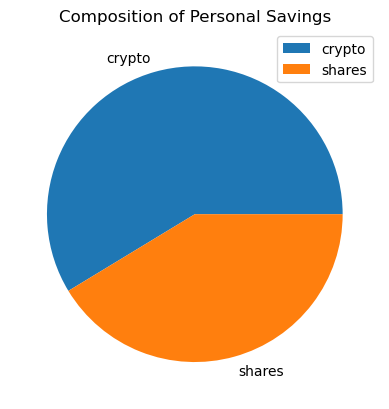

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Composition of Personal Savings', ylabel='')

In [15]:
# Set ideal emergency fund to three times the monthly income of $12000
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value

# Use control flow to validate saving health and determine if an emergency fund is feasible 
if total_savings > emergency_fund:
    print(f'Congratulations on your savings. You are ${total_savings-emergency_fund:0.2f} above your target and can open an emergency fund.')
elif total_savings == emergency_fund: 
    print(f'Bingo! You have met your savings goal of ${emergency_fund:0.2f} and can open an emergency fund.')
else:
    print(f'Almost there! You are ${emergency_fund - total_savings*100:0.2f} from your savings target.')

Congratulations on your savings. You are $70566.26 above your target and can open an emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today and convert to iso format 
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-01-25', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-01-25', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG using get_bars() function and transform to a Dataframe
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end= end_date
).df

# Reorganize the DataFrame
# Separate ticker data and drop the symbol column
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames and set a new index to identify each dataframe respecitively
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])


# Display sample data
df_stock_data.head()

SPY                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2019-01-25 05:00:00+00:00  265.78  266.70  263.6595      409292  265.61   
2019-01-28 05:00:00+00:00  263.78  263.83  261.7900      408382  263.39   
2019-01-29 05:00:00+00:00  263.52  264.55  262.4800      287012  263.92   
2019-01-30 05:00:00+00:00  267.44  268.52  264.2500      469964  265.10   
2019-01-31 05:00:00+00:00  269.81  270.47  267.2700      407112  267.51   

                                                     AGG                    \
                              volume        vwap   close     high      low   
timestamp                                                                    
2019-01-25 05:00:00+00:00   98218282  265.862184  106.68  106.700  106.560   
2019-01-28 05:00:00+00:00   87421778  263.369609  106.62  106.745  106.580   
2019-01-29 05:00:00+00:00   67650406  263.505274  106.90  106.925  106.685   
2019-01-30 05:00:00+00:00   93982824  266.596859  107.14  107.150  106.790   
2019-01-31 05:00:00+00:00  107152582  269.463122  107.46  107.530  107.290   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2019-01-25 05:00:00+00:00       15541  106.64   3633492  106.640407  
2019-01-28 05:00:00+00:00       17764  106.62   8294535  106.634323  
2019-01-29 05:00:00+00:00       17524  106.73   6737073  106.839335  
2019-01-30 05:00:00+00:00       18798  106.79   7508665  107.030162  
2019-01-31 05:00:00+00:00       40561  107.30  16852710  107.452225

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# using the MCSimulation class use the data for SPY and AGG to run 500 simulations over thirty years with a distribution of SPY = 60% and AGG = 40%
MC_retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4], 
    num_simulation = 500,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
MC_retirement.portfolio_data.head()

SPY                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2019-01-25 05:00:00+00:00  265.78  266.70  263.6595      409292  265.61   
2019-01-28 05:00:00+00:00  263.78  263.83  261.7900      408382  263.39   
2019-01-29 05:00:00+00:00  263.52  264.55  262.4800      287012  263.92   
2019-01-30 05:00:00+00:00  267.44  268.52  264.2500      469964  265.10   
2019-01-31 05:00:00+00:00  269.81  270.47  267.2700      407112  267.51   

                                                                  AGG  \
                              volume        vwap daily_return   close   
timestamp                                                               
2019-01-25 05:00:00+00:00   98218282  265.862184          NaN  106.68   
2019-01-28 05:00:00+00:00   87421778  263.369609    -0.007525  106.62   
2019-01-29 05:00:00+00:00   67650406  263.505274    -0.000986  106.90   
2019-01-30 05:00:00+00:00   93982824  266.596859     0.014876  107.14   
2019-01-31 05:00:00+00:00  107152582  269.463122     0.008862  107.46   

                                                                           \
                              high      low trade_count    open    volume   
timestamp                                                                   
2019-01-25 05:00:00+00:00  106.700  106.560       15541  106.64   3633492   
2019-01-28 05:00:00+00:00  106.745  106.580       17764  106.62   8294535   
2019-01-29 05:00:00+00:00  106.925  106.685       17524  106.73   6737073   
2019-01-30 05:00:00+00:00  107.150  106.790       18798  106.79   7508665   
2019-01-31 05:00:00+00:00  107.530  107.290       40561  107.30  16852710   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-01-25 05:00:00+00:00  106.640407          NaN  
2019-01-28 05:00:00+00:00  106.634323    -0.000562  
2019-01-29 05:00:00+00:00  106.839335     0.002626  
2019-01-30 05:00:00+00:00  107.030162     0.002245  
2019-01-31 05:00:00+00:00  107.452225     0.002987

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 110.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 120.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 130.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 140.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 150.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 160.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 170.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 180.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 190.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 200.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 210.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 220.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 230.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 240.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 250.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 260.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 270.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 280.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 290.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 300.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 310.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 320.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 330.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 340.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 350.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 360.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 370.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 380.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 390.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 400.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 410.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 420.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 430.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 440.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 450.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 460.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 470.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 480.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 490.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012396,1.002455,1.003372,0.991787,0.997300,0.998848,0.998197,0.996618,0.992775,1.003175,...,0.996898,1.007519,1.005102,1.012704,1.003918,1.009314,1.007730,0.992329,1.004789,1.019015
2,0.999558,0.995175,0.987234,1.003432,1.001218,1.012501,1.004065,0.994901,0.994602,0.994703,...,1.006989,1.005747,1.009333,1.007306,1.008295,1.012370,1.018619,0.981531,1.009599,1.006238
3,1.007330,0.985089,0.974590,0.989421,0.998164,1.006602,1.004633,0.999660,0.990756,0.980967,...,1.002071,0.987028,1.001601,1.003357,1.013609,1.004516,1.022375,0.984552,0.995112,1.022234
4,0.995738,0.984721,0.984664,0.987756,0.995149,1.014465,0.996348,0.990098,0.983190,0.986319,...,0.991949,0.974548,1.012155,1.013310,1.011176,1.017071,1.030808,0.968985,0.983087,1.021113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.433954,8.290949,5.860431,6.400909,12.338430,21.801832,10.974912,1.354827,3.330839,3.550064,...,8.122553,6.160157,16.620003,6.859016,10.087525,9.034562,11.364541,4.863480,5.216326,11.627175
7557,2.449804,8.258846,5.844418,6.309358,12.218335,21.832052,11.011980,1.353151,3.322833,3.551400,...,8.273120,6.160159,16.795260,6.832430,10.038823,8.998644,11.413602,4.859343,5.194984,11.684796
7558,2.447388,8.255452,5.891103,6.241790,12.275910,21.922032,11.025492,1.361325,3.320829,3.497038,...,8.313866,6.230683,16.949005,6.841334,10.096621,8.980081,11.412466,4.929953,5.249340,11.648843
7559,2.432299,8.240684,5.849984,6.280644,12.425599,22.064337,11.079387,1.373128,3.336731,3.521419,...,8.279503,6.232841,16.977881,6.796265,10.047371,8.883690,11.328547,4.919312,5.343527,11.644830


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

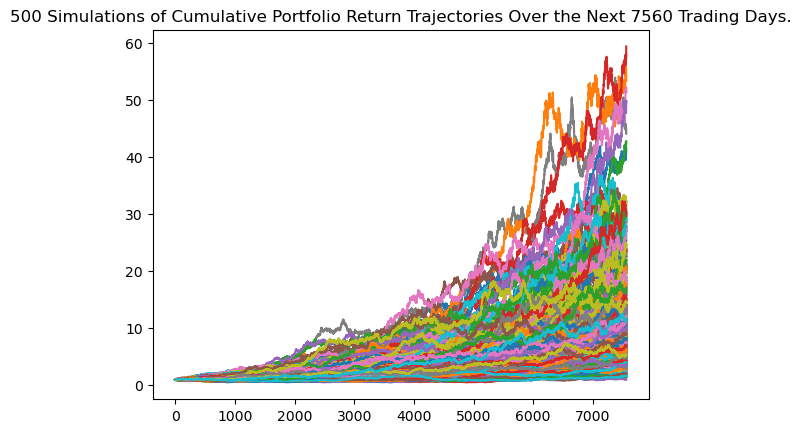

In [27]:
# Plot simulation outcomes
MC_retirement.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

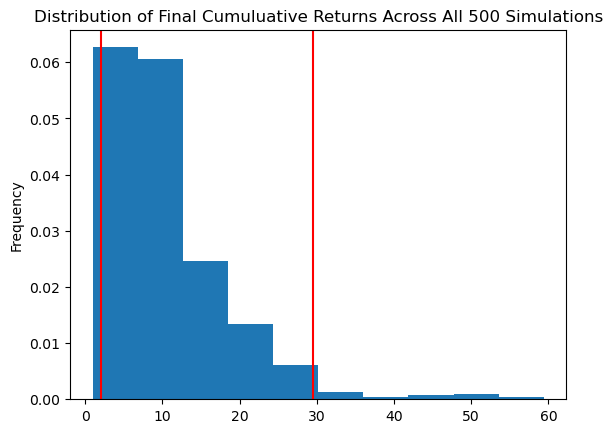

In [28]:
# Plot probability distribution and confidence intervals
MC_retirement.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_tbl = MC_retirement.summarize_cumulative_return()

# Print summary statistics
print(retirement_tbl)

count           500.000000
mean             10.682195
std               7.994729
min               0.987273
25%               5.425495
50%               8.532741
75%              13.237156
max              59.394288
95% CI Lower      1.982500
95% CI Upper     29.474194
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment of $20000
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# Retrieve the data from the retirment_tbl and multiply by initial investment
ci_lower = round(retirement_tbl[8]*initial_investment, 2)
ci_upper = round(retirement_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $39649.99 and $589483.87


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment to 1.5 times $20000
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# Retrieve the data from the retirment_tbl and multiply by initial investment
ci_lower = round(retirement_tbl[8]*initial_investment, 2)
ci_upper = round(retirement_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $59474.99 and $884225.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [44]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# using the MCSimulation class use the data for SPY and AGG to run 500 simulations over five years with a distribution of SPY = 60% and AGG = 40%
MC_retirement_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4], 
    num_simulation = 500,
    num_trading_days = 252*5
)

In [45]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_retirement_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 110.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 120.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 130.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 140.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 150.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 160.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 170.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 180.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 190.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 200.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 210.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 220.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 230.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 240.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 250.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 260.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 270.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 280.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 290.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 300.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 310.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 320.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 330.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 340.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 350.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 360.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 370.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 380.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 390.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 400.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 410.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 420.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 430.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 440.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 450.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 460.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 470.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 480.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 490.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989990,0.991341,1.000380,1.000070,1.005320,1.009543,0.993338,0.992834,1.013363,0.999187,...,1.007478,1.001319,1.000732,1.006949,0.999963,0.999384,1.005242,0.987647,1.006274,0.992622
2,0.990939,0.992102,1.011629,1.005093,1.016240,1.014254,0.990003,1.003553,1.011218,0.991739,...,0.996709,1.026908,1.001724,1.013383,0.980548,1.003228,1.005799,0.981356,1.002646,0.997202
3,0.985117,1.002397,1.015016,1.004809,1.011618,1.020176,0.986189,1.002181,1.007891,0.985213,...,1.000402,1.033240,1.010754,1.027215,0.985120,1.015688,0.994978,1.002526,1.009548,1.000563
4,0.979763,0.996750,1.021740,1.002200,1.012815,1.016286,0.982068,1.001157,1.007022,0.987377,...,0.993781,1.027605,1.003963,1.028934,0.987613,1.013311,0.982029,0.996682,1.017426,0.998547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.430279,1.646571,2.258672,1.524261,1.487659,1.660745,1.019859,0.998150,1.316926,1.083737,...,0.893198,1.550438,1.969987,1.462365,0.984656,1.390230,1.830094,1.635241,1.274930,1.861606
1257,1.426289,1.645768,2.258819,1.520672,1.486192,1.686526,1.024435,1.001148,1.319090,1.068254,...,0.885293,1.545288,1.984002,1.451396,0.996247,1.385021,1.850975,1.638401,1.270358,1.871011
1258,1.421026,1.654905,2.269050,1.512148,1.501735,1.694128,1.035675,1.004224,1.323086,1.049217,...,0.887577,1.545925,1.985948,1.453706,0.989213,1.383535,1.828463,1.643092,1.275031,1.871405
1259,1.426757,1.650714,2.272215,1.516852,1.497919,1.698790,1.043206,1.001233,1.342133,1.052037,...,0.902267,1.546850,1.971543,1.438062,0.990289,1.407177,1.830733,1.670562,1.265488,1.885555


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

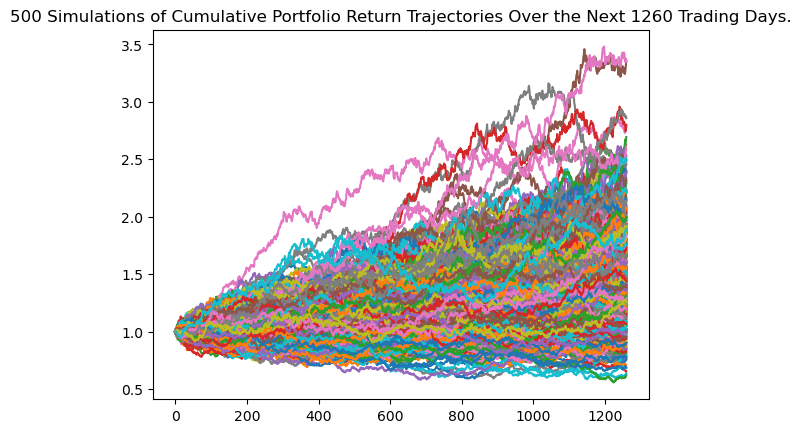

In [46]:
# Plot simulation outcomes
MC_retirement_fiveyear.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

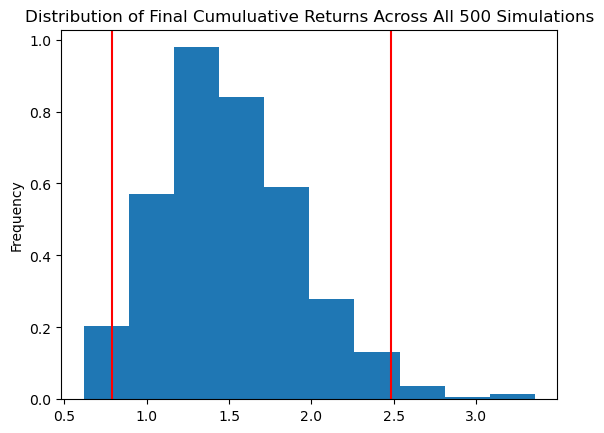

In [47]:
# Plot probability distribution and confidence intervals
MC_retirement_fiveyear.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_fiveyear_tbl = MC_retirement_fiveyear.summarize_cumulative_return()


# Print summary statistics
print(retirement_fiveyear_tbl)

count           500.000000
mean              1.509097
std               0.431986
min               0.618662
25%               1.216283
50%               1.459915
75%               1.774159
max               3.356935
95% CI Lower      0.791534
95% CI Upper      2.486279
Name: 1260, dtype: float64


In [49]:
# Set initial investment of $100000
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
ci_lower_five = round(retirement_fiveyear_tbl[8]*initial_investment, 2)
ci_upper_five = round(retirement_fiveyear_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $79153.35 and $248627.88


### Ten Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retirement_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4], 
    num_simulation = 500,
    num_trading_days = 252*10
)

In [51]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retirement_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 110.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 120.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 130.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 140.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 150.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 160.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 170.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 180.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 190.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 200.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 210.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 220.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 230.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 240.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 250.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 260.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 270.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 280.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 290.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 300.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 310.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 320.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 330.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 340.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 350.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 360.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 370.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 380.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 390.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 400.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 410.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 420.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 430.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 440.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 450.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 460.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 470.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 480.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

Running Monte Carlo simulation number 490.


/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-University-Fintech-2023/Module 5/Weekly Challenge - Financial Planner/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/mikaelborneo/Desktop/Columbia-Universit

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005831,1.008673,1.011914,1.022444,1.000023,1.003736,1.009789,1.009758,0.992059,0.993401,...,0.997190,0.995833,1.003735,1.001609,0.997969,0.995093,0.993779,0.992174,1.003860,1.008951
2,1.001708,1.008344,1.002246,1.021301,0.997884,1.007198,1.002013,1.009505,0.991456,0.980414,...,0.998548,0.994958,0.991370,1.011196,0.996947,0.985905,0.994144,0.997438,1.005949,1.015844
3,0.991550,1.017827,1.023615,1.031809,0.998085,1.018617,0.999947,0.998492,0.987407,0.989652,...,0.994803,0.997584,0.973906,1.019680,0.992820,0.983109,0.987785,0.979843,1.009147,1.007507
4,0.992079,1.018676,1.014458,1.034517,0.998296,1.011649,0.991051,0.990812,0.979663,0.994411,...,1.008084,0.998623,0.988309,1.017877,0.986714,0.970162,0.999594,0.972227,1.011817,0.998963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.265339,4.656703,1.716334,1.318596,1.871408,3.705119,2.867378,2.095151,1.904976,2.169115,...,2.540563,1.853309,5.823247,1.120660,1.967639,1.858130,1.065926,2.268770,2.258036,2.568327
2517,1.261675,4.646549,1.703193,1.314746,1.878128,3.743176,2.853814,2.106727,1.904486,2.165296,...,2.508986,1.852326,5.834715,1.114554,1.965816,1.864559,1.064851,2.298998,2.246370,2.593367
2518,1.264761,4.649986,1.722656,1.326795,1.880525,3.731568,2.838308,2.105342,1.870750,2.190155,...,2.529762,1.854339,5.807177,1.103955,1.969388,1.864331,1.084691,2.288146,2.287683,2.576857
2519,1.264279,4.604239,1.732865,1.337981,1.875192,3.729088,2.836544,2.126640,1.851223,2.165299,...,2.509485,1.866471,5.758045,1.093570,1.987000,1.859057,1.075745,2.296700,2.292967,2.614725


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

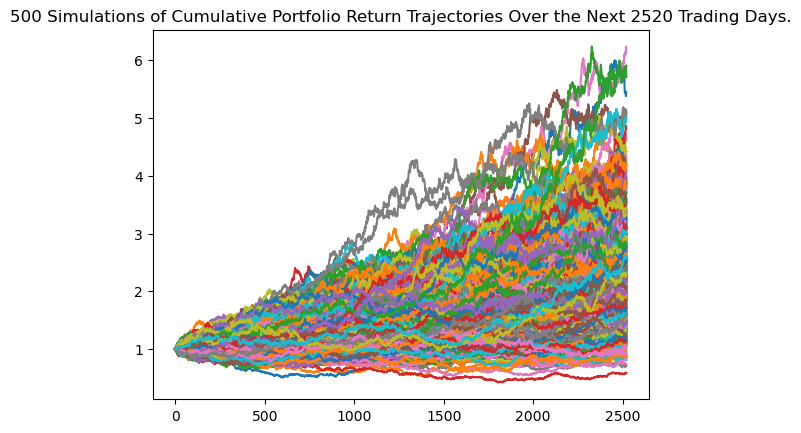

In [52]:
# Plot simulation outcomes
MC_retirement_tenyear.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

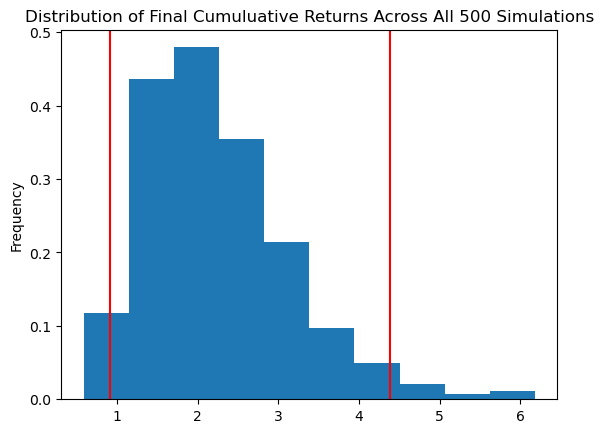

In [53]:
# Plot probability distribution and confidence intervals
MC_retirement_tenyear.plot_distribution()

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_tenyear_tbl = MC_retirement_tenyear.summarize_cumulative_return()

# Print summary statistics
print(retirement_tenyear_tbl)

count           500.000000
mean              2.242903
std               0.911291
min               0.589341
25%               1.579844
50%               2.080228
75%               2.726192
max               6.180227
95% CI Lower      0.913471
95% CI Upper      4.382374
Name: 2520, dtype: float64


In [56]:
# Set initial investment of $100000
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes 
ci_lower_ten = round(retirement_tenyear_tbl[8]*initial_investment, 2)
ci_upper_ten = round(retirement_tenyear_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $91347.08 and $438237.39
